<a href="https://colab.research.google.com/github/saniya1-709/OIBSIP/blob/main/Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Imporingt required libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## **Loading and Preprocessing the Data**

In [9]:
#Loading the dataset
file_path = "/content/WineQT[1].csv"
wine_data = pd.read_csv(file_path)

In [10]:
# Dropping unnecessary columns
wine_data = wine_data.drop(columns=["Id"])

In [11]:
# Checking for null values
print("Null values in dataset:")
print(wine_data.isnull().sum())

Null values in dataset:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


## **Exploratory Data Analysis (EDA)**

In [12]:
# Correlation matrix
correlation_matrix = wine_data.corr()

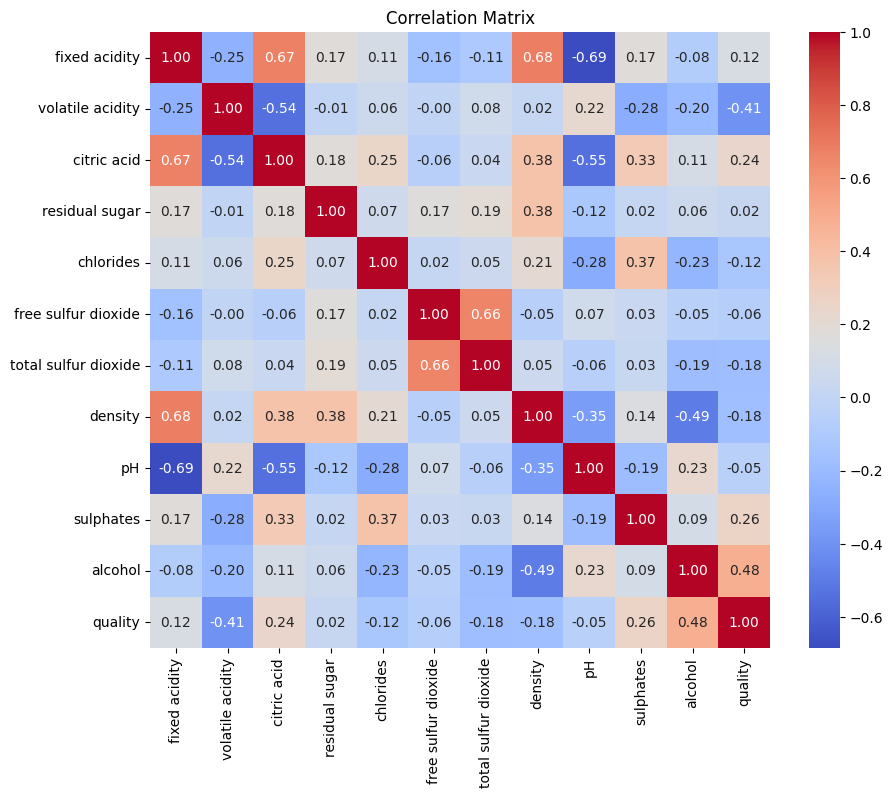

In [13]:
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## **Prepare Data for Modeling**

In [14]:
# Defining features and target variable
X = wine_data.drop(columns=["quality"])
y = wine_data["quality"]

In [15]:
# Train-test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## **Build and Evaluate Models**

In [16]:
# Initializing models
rf_model = RandomForestClassifier(random_state=42)
sgd_model = SGDClassifier(random_state=42)
svc_model = SVC(random_state=42)

In [19]:
# Training and Evaluating SGD Classifier
sgd_model.fit(X_train, y_train)
sgd_preds = sgd_model.predict(X_test)
sgd_accuracy = accuracy_score(y_test, sgd_preds)
print("SGD Classifier Accuracy:", sgd_accuracy)
print("Classification Report for SGD Classifier:")
print(classification_report(y_test, sgd_preds, zero_division=0))


SGD Classifier Accuracy: 0.42358078602620086
Classification Report for SGD Classifier:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.43      1.00      0.60        97
           6       0.00      0.00      0.00        92
           7       0.00      0.00      0.00        29
           8       0.00      0.00      0.00         3

    accuracy                           0.42       229
   macro avg       0.07      0.17      0.10       229
weighted avg       0.18      0.42      0.26       229



In [21]:
# Training and Evaluating SVC
svc_model.fit(X_train, y_train)
svc_preds = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_preds)
print("SVC Accuracy:", svc_accuracy)
print("Classification Report for SVC:")
print(classification_report(y_test, svc_preds, zero_division=0))

SVC Accuracy: 0.5414847161572053
Classification Report for SVC:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.75      0.43      0.55        97
           6       0.47      0.89      0.62        92
           7       0.00      0.00      0.00        29
           8       0.00      0.00      0.00         3

    accuracy                           0.54       229
   macro avg       0.20      0.22      0.19       229
weighted avg       0.51      0.54      0.48       229



## **Visualizing Results**

In [22]:
# Model performance summary
performance_summary = {
    "Model": ["Random Forest", "SGD Classifier", "SVC"],
    "Accuracy": [rf_accuracy, sgd_accuracy, svc_accuracy]
}
performance_summary_df = pd.DataFrame(performance_summary)
print("Model Performance Summary:")
print(performance_summary_df)

Model Performance Summary:
            Model  Accuracy
0   Random Forest  0.716157
1  SGD Classifier  0.423581
2             SVC  0.541485


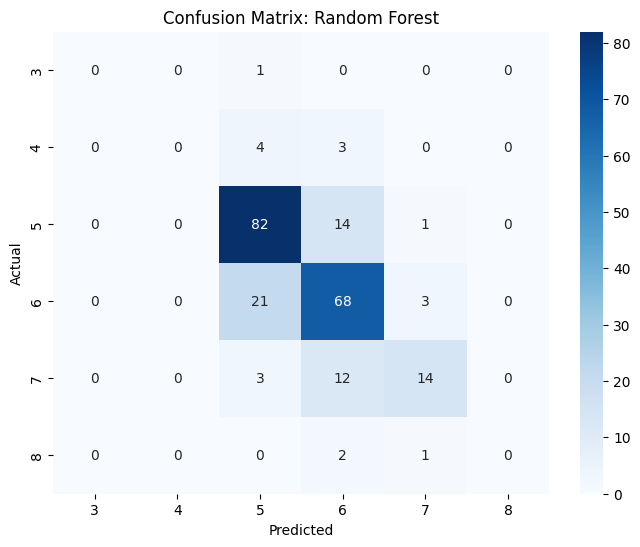

In [23]:
# Confusion matrix for the best model (Random Forest in this case)
rf_cm = confusion_matrix(y_test, rf_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix: Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()